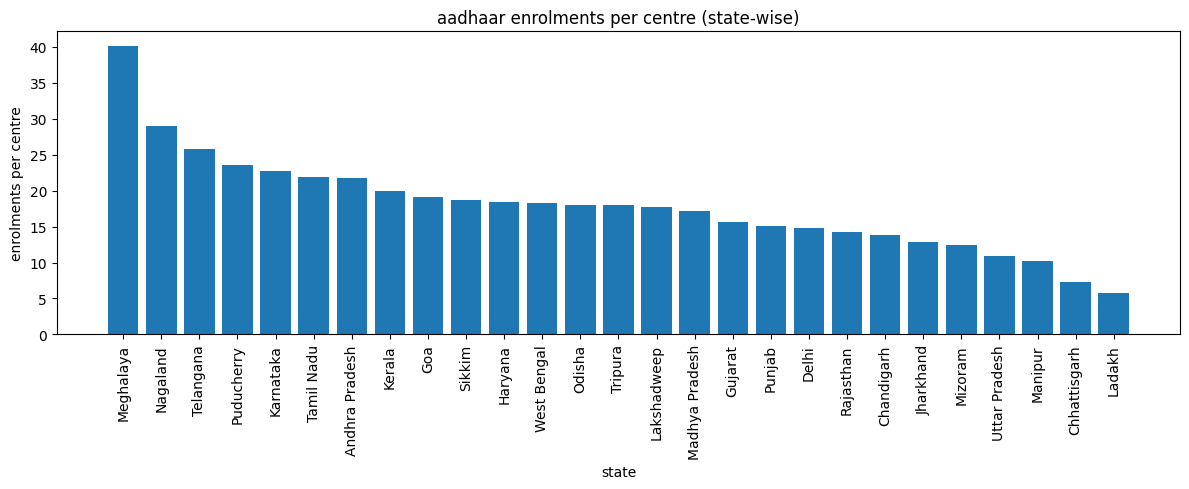

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")

enrolments=(
    enrolment_df
    .groupby("state")
    .size()
    .rename("enrolment_events")
    .reset_index()
)



centres=pd.read_csv("../sql/data/Aadhar.csv")

centres=centres.rename(columns={
    "State":"state",
    "No. of centres":"centres"
})

centres["centres"]=pd.to_numeric(centres["centres"],errors="coerce")



df=enrolments.merge(centres,on="state",how="inner")


df["enrolments_per_centre"]=df["enrolment_events"]/df["centres"]

df=df.sort_values("enrolments_per_centre",ascending=False)



plt.figure(figsize=(12,5))
plt.bar(df["state"],df["enrolments_per_centre"])
plt.xticks(rotation=90)
plt.xlabel("state")
plt.ylabel("enrolments per centre")
plt.title("aadhaar enrolments per centre (state-wise)")
plt.tight_layout()
plt.show()
